In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pypalettes import load_cmap
from highlight_text import ax_text, fig_text
from pyfonts import load_google_font, load_font
from drawarrow import ax_arrow
from pypalettes import load_cmap
from pypalettes import add_cmap
import matplotlib.patches as patches
import warnings


warnings.filterwarnings("ignore")


In [2]:
# path
merged_path = r"D:\Learning\Data Visualization\data\world\marriage_age\marriage_age\data\marriage_age_merged_clean.csv"

# data
data = pd.read_csv(merged_path)
df = data.copy()

## Observations
Low middle income countries:
1. Reg. line relatively away from identity vs. High income countries
2. Reg. line slope ($0.86$) $\gt$ High income countries slope ($0.6$)
3. More spread out vs. High income countries

## Possible explanations
1. Lower middle income countries' reg. line relatively away from identity vs. High income countries $\rightarrow$ Gender gap in age of marriage is higher in lower middle income countries
   1. Lower income often leads to poorer living conditions and lack of availability & access to oppotunities for empowering oneself. This leads to higher competition. Combined with male-preference, often women lose out on opportunities and are married off earlier 
2. Lower middle income countries' reg. line slope ($0.86$) $\gt$ High income countries slope ($0.6$) $\rightarrow$ When women delay age of first marriage, gender gap does not shrink as much as in high income countries
   1. Gap which was higher in lower middle income countries still remains significant
3. More spread out vs. High income countries
   1. Lower middle income countries show larger variations when it comes to acceptable age of getting married
   2. As income increases & living conditions improve, social norms tend to become similar on when people should get married

## Data

In [3]:
df = data[data["Income group"] != 'Unclassified']

In [4]:
df2 = df.copy()

## Visual Essentials

In [5]:
# color mapping
cmap = {
    'High income':"#4B7F52",
    'Lower middle income':"#8A2D3B",
    'Upper middle income':"#CCCCCC"
}
bg = "#FFFDF6"

In [6]:
# font
# qualifier
font_qualifier = "?raw=true"
noto = load_font(r"https://github.com/google/fonts/blob/main/ofl/notoserif/NotoSerif%5Bwdth%2Cwght%5D.ttf" + font_qualifier)
noto_i = load_font(r"https://github.com/google/fonts/blob/main/ofl/notoserif/NotoSerif-Italic%5Bwdth%2Cwght%5D.ttf" + font_qualifier)

merri = load_font(r"https://github.com/google/fonts/blob/main/ofl/merriweather/Merriweather%5Bopsz%2Cwdth%2Cwght%5D.ttf" + font_qualifier)
merri_i = load_font(r"https://github.com/google/fonts/blob/main/ofl/merriweather/Merriweather-Italic%5Bopsz%2Cwdth%2Cwght%5D.ttf" + font_qualifier)

dm = load_font(r"https://github.com/google/fonts/blob/main/ofl/dmseriftext/DMSerifText-Regular.ttf" + font_qualifier)
dm_i = load_font(r"https://github.com/google/fonts/blob/main/ofl/dmseriftext/DMSerifText-Italic.ttf" + font_qualifier)

charm = load_font(r"https://github.com/google/fonts/blob/main/ofl/charm/Charm-Regular.ttf" + font_qualifier)
charm_b = load_font(r"https://github.com/google/fonts/blob/main/ofl/charm/Charm-Bold.ttf" + font_qualifier)


tinos = load_font(r"https://github.com/google/fonts/blob/main/apache/tinos/Tinos-Regular.ttf" + font_qualifier)
tinos_i = load_font(r"https://github.com/google/fonts/blob/main/apache/tinos/Tinos-Italic.ttf" + font_qualifier)
tinos_bi = load_font(r"https://github.com/google/fonts/blob/main/apache/tinos/Tinos-BoldItalic.ttf" + font_qualifier)

In [7]:
# Title & Description
title = """
Where There's Wealth, There's Waiting
"""

sub_title = """
As nations become wealthier, people wait longer before getting married
"""

breaker = "- • -"

para_1 = """
In countries with <lower income> levels, men tend to marry several years after women —\n
this <age gap remains wide> even when women begin marrying later.\n
In contrast, <high-income> countries not only see people <marrying later> overall,\n
but also show a much <smaller gap> between the ages at which men and women marry.
"""

para_2 = """
As nations grow wealthier,\n
they often provide individuals with more freedom and time to pursue their own goals.\n
With better education, healthcare, and economic security,\n
people—regardless of gender—tend to delay marriage in favor of self-development.
"""

para_3 = """
On the other hand, lower-income countries often face the opposite.\n
Fewer resources, gendered social norms, and economic constraints—\n
combined with pre-existing male-preference biases—\n
this can leave women with fewer options, in turn leading them to marrying younger,\n
even as men continue to delay marriage, sustaining a large gender gap.
"""

In [8]:
# Annotations for arrows
# identity line
identity = """
If men and women in a country\n
married at the same age, then\n
that country would lie on this line
"""

# regression lines
reg_low = """
Trend lines showing marriage age norms\n
in <lower income> countries
"""
reg_high = """
Trend lines showing marriage age norms\n
in <high income> countries
"""

# legend
leg_low = """
<Women> in <lower income> countries\n
tend to <mary earlier> than men
"""


# Annotations for miscellaneous info.
credits = """
All data sourced from World Bank (WB) database
"""

# legend
legend_inputs = {
    "High income":["High Income Country", cmap.get("High income")],
    "Lower middle income":["Lower-middle or Low Income Country", cmap.get("Lower middle income")]
}

## Visual Story

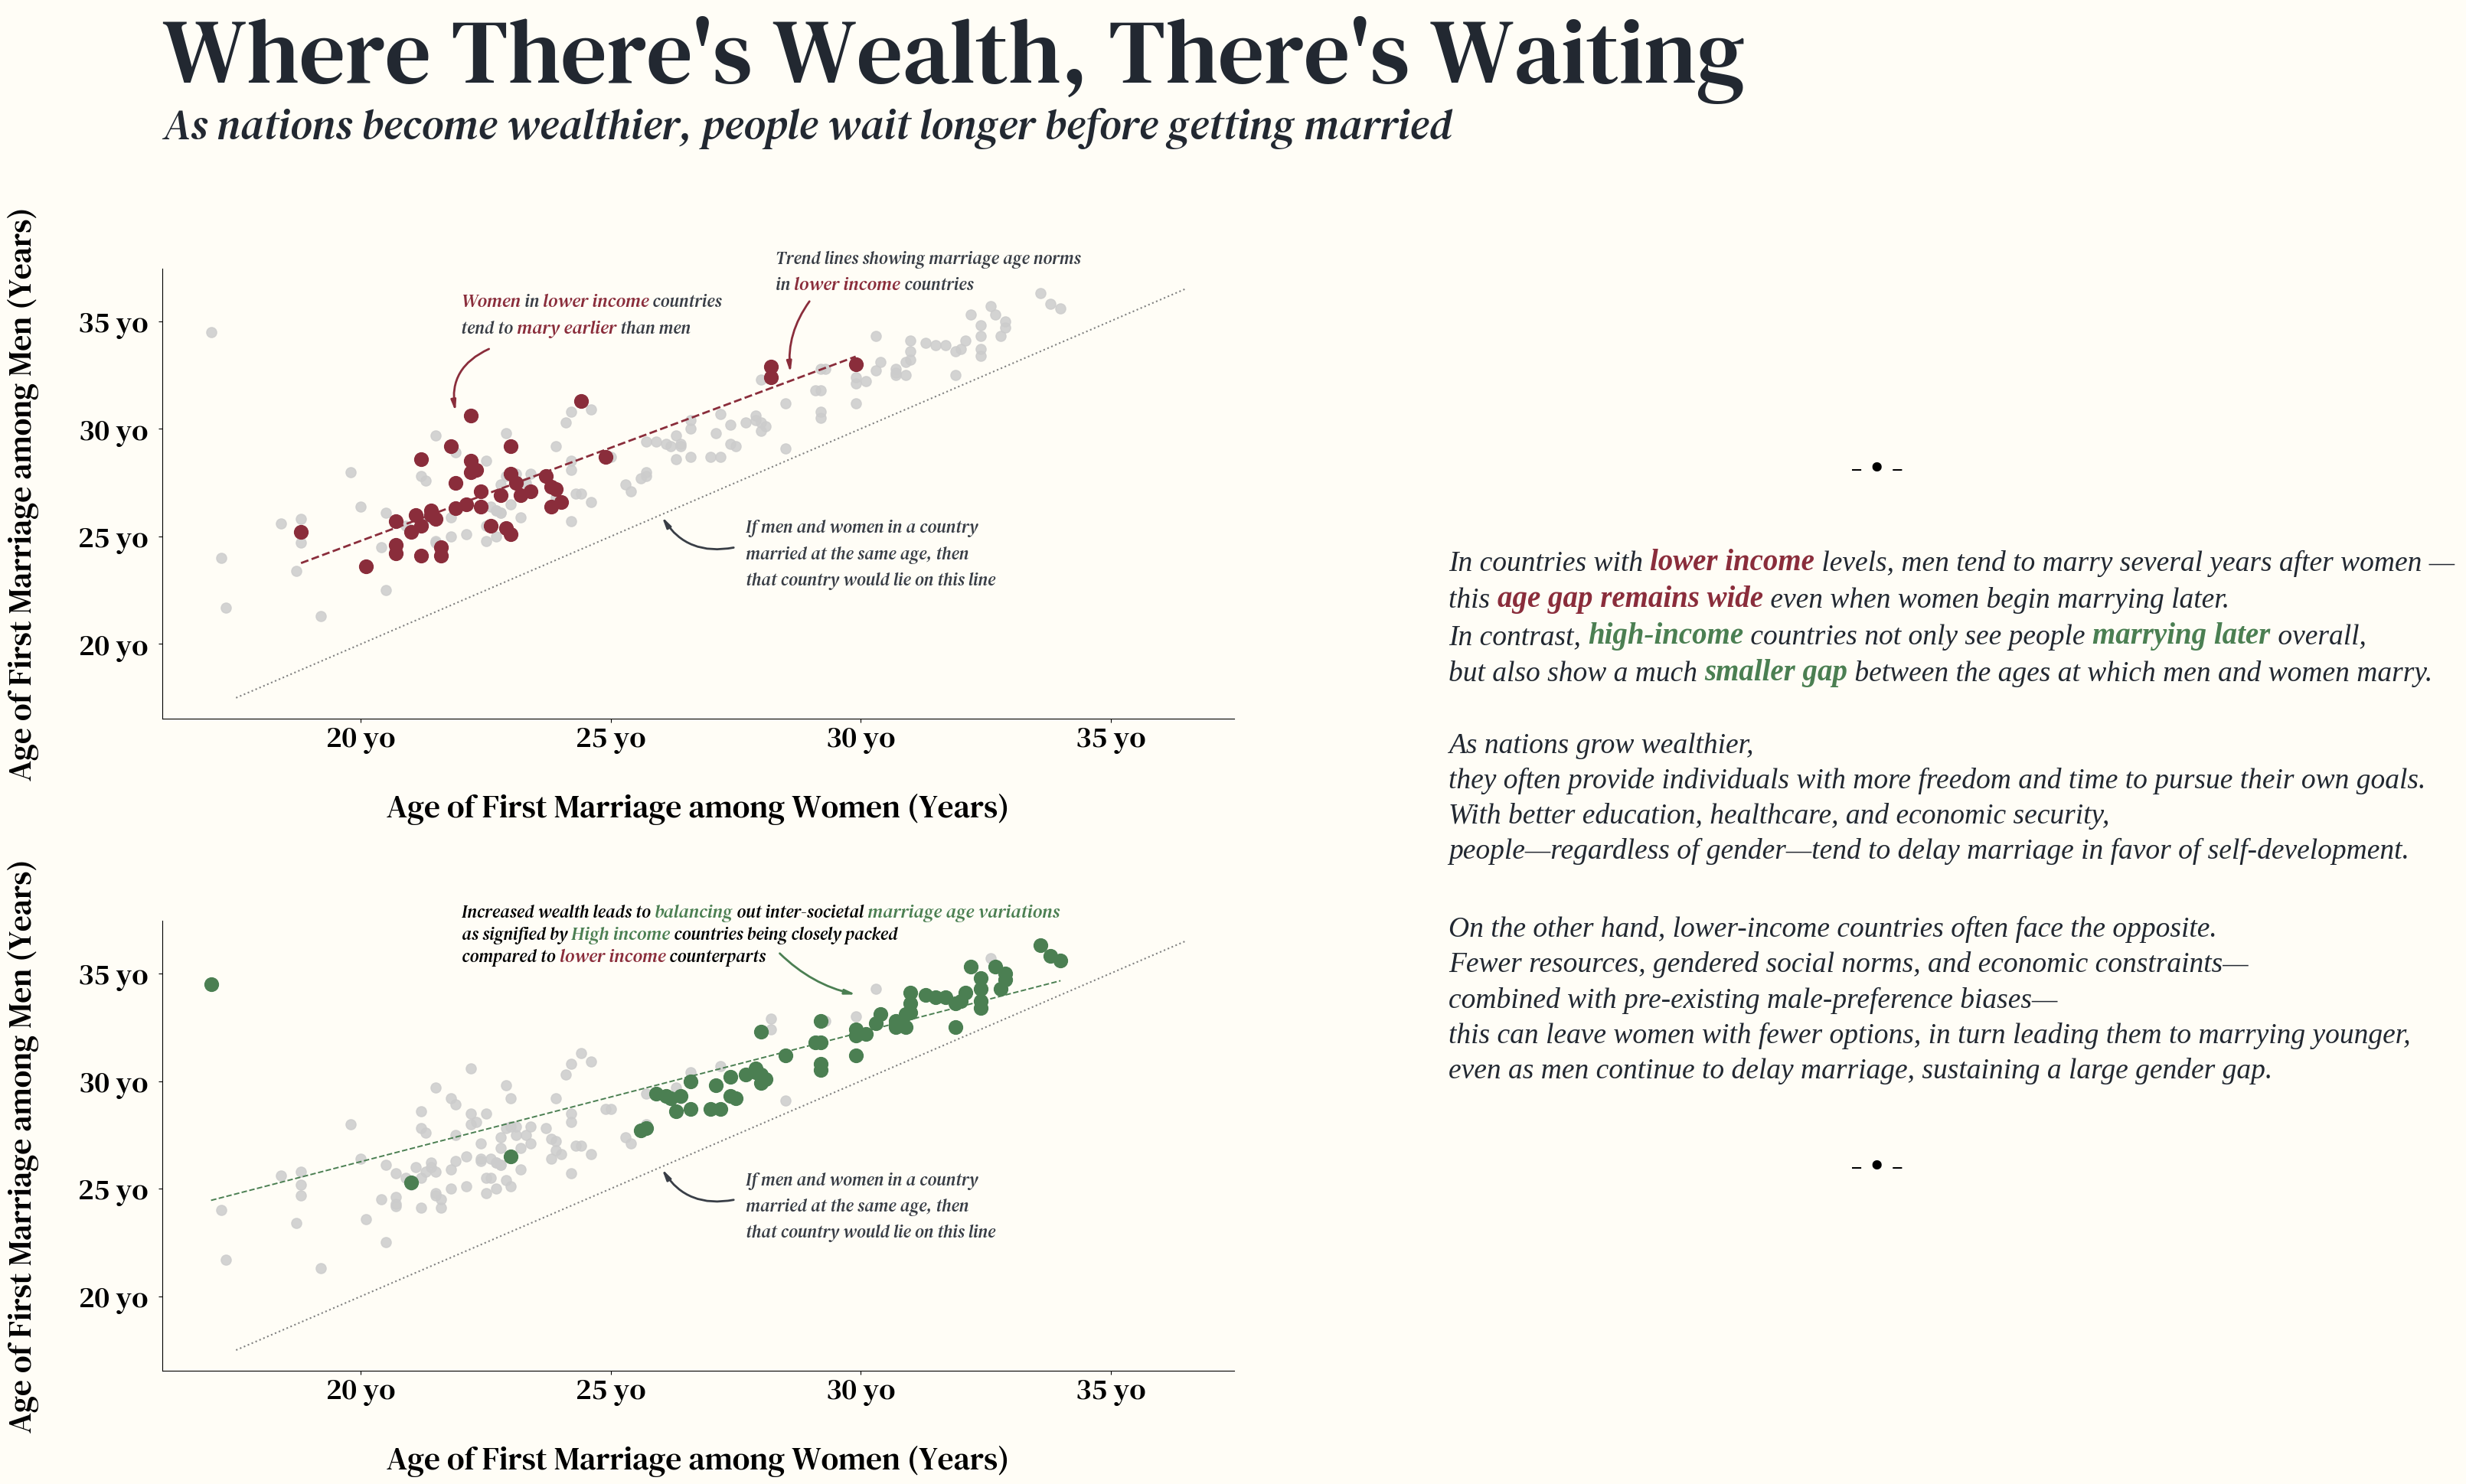

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=(35,24), nrows=2, ncols=1)

ax_low, ax_high = ax

fig.set_facecolor(bg)

fig.subplots_adjust(top=0.75, bottom=0.15, left=0.10, right=.5, hspace=0.45)

fig_text(x=0.10, y=0.89, s=title, size=86, font=dm, color="#222831")
fig_text(x=0.10, y=0.84, s=sub_title, size=40, font=dm_i, color="#222831")
fig_text(x=0.73, y=0.65, s=breaker, size=35, font=dm)
fig_text(x=0.58, y=0.6, s=para_1, size=27, font=tinos_i, color="#222831",
         highlight_textprops=[
              dict(font=tinos_bi, size=28, color=cmap.get("Lower middle income")),
              dict(font=tinos_bi, size=28, color=cmap.get("Lower middle income")),
              dict(font=tinos_bi, size=28, color=cmap.get("High income")),
              dict(font=tinos_bi, size=28, color=cmap.get("High income")),
              dict(font=tinos_bi, size=28, color=cmap.get("High income"))
         ])
fig_text(x=0.58, y=0.5, s=para_2, size=27, font=tinos_i, color="#222831")
fig_text(x=0.58, y=0.4, s=para_3, size=27, font=tinos_i, color="#222831")
fig_text(x=0.73, y=0.27, s=breaker, size=35, font=dm)

for ax in ax:
    ax.set_facecolor(bg)
    ax.spines[["top", "right"]].set_visible(0)


# Highlight maps
# Plot non-highlighted (grey) points first
non_high_df = df2[df2["Income group"] != "High income"]
non_low_df = df2[df2["Income group"] != "Lower middle income"]

# Plot all grey points first
ax_high.scatter(non_high_df["Age_female"], non_high_df["Age_male"], 
                color="#CCCCCC", s=90, edgecolors=None, alpha=0.85)
ax_low.scatter(non_low_df["Age_female"], non_low_df["Age_male"], 
               color="#CCCCCC", s=90, edgecolors=None, alpha=0.85)

# Now plot the highlighted points on top
highlight_high_df = df2[df2["Income group"] == "High income"]
highlight_low_df = df2[df2["Income group"] == "Lower middle income"]

ax_high.scatter(highlight_high_df["Age_female"], highlight_high_df["Age_male"],
                color=cmap["High income"], s=165, edgecolors=None, zorder=3)
ax_low.scatter(highlight_low_df["Age_female"], highlight_low_df["Age_male"],
               color=cmap["Lower middle income"], s=165, edgecolors=None, zorder=3)

# identity line
ax_high.plot([17.5,36.5], [17.5,36.5], color="grey", linestyle=":", linewidth=1.5, alpha=1)
ax_low.plot([17.5,36.5], [17.5,36.5], color="grey", linestyle=":", linewidth=1.5, alpha=1)


for group, group_df in df2.groupby(by="Income group"):
    if group == "High income":
        age_f = group_df["Age_female"]
        age_m = group_df["Age_male"]
        age_diff = group_df["Age_difference"]
        color = cmap.get(group)
        alpha = 1
        m, b = np.polyfit(age_f, age_m, deg=1)
        reg_x = np.linspace(age_f.min(), age_f.max(), num=200)
        reg_y = m*reg_x + b

        ax_high.plot(reg_x, reg_y, color=cmap.get(group),
                linestyle="--", linewidth=1.4, alpha=alpha)
    
    elif group == "Lower middle income":
            age_f = group_df["Age_female"]
            age_m = group_df["Age_male"]
            age_diff = group_df["Age_difference"]
            color = cmap.get(group)
            alpha = 1
            m, b = np.polyfit(age_f, age_m, deg=1)
            reg_x = np.linspace(age_f.min(), age_f.max(), num=200)
            reg_y = m*reg_x + b

            ax_low.plot(reg_x, reg_y, color=cmap.get(group),
                    linestyle="--", linewidth=2, alpha=alpha)

    else:
         pass    
        
axis_fonts = dict(font=dm, size=30)
ax_high.set_xlabel("\nAge of First Marriage among Women (Years)", **axis_fonts)
ax_high.set_ylabel("Age of First Marriage among Men (Years)\n", **axis_fonts)
ax_low.set_xlabel("\nAge of First Marriage among Women (Years)", **axis_fonts)
ax_low.set_ylabel("Age of First Marriage among Men (Years)\n", **axis_fonts)


# gender equal line annotation
for a in [ax_low, ax_high]:
    ax_arrow(
        head_position=[26, 26],
        tail_position=[27.5, 24.5],
        ax=a, radius=-0.35, color="#393E46",
        fill_head=True, head_width=1.85,
        zorder=10, width=2, alpha=1
    )
annotation_identity_fonts = dict(font=dm_i, size=16.5, ha="left", va="top", color="#393E46")
ax_text(x=27.7, y=26, s=identity,
        ax=ax_high, **annotation_identity_fonts
        )
ax_text(x=27.7, y=26, s=identity,
        ax=ax_low, **annotation_identity_fonts
        )

# ANNOTATIONS
# low income country annotation
ax_arrow(
        head_position=[21.9, 30.7],
        tail_position=[22.6, 33.75],
        ax=ax_low, radius=0.4, color=cmap.get("Lower middle income"),
        fill_head=True, head_width=1.85,
        zorder=10, width=2, alpha=1
    )
ax_text(
     x=22, y=36.5, s=leg_low,
     ax=ax_low,
     highlight_textprops=[
          dict(color=cmap.get("Lower middle income"), font=dm_i, size=17.5),
          dict(color=cmap.get("Lower middle income"), font=dm_i, size=17.5),
          dict(color=cmap.get("Lower middle income"), font=dm_i, size=17.5)
     ], **annotation_identity_fonts
)
# lower income country regression line
ax_arrow(
        head_position=[28.6, 32.5],
        tail_position=[29, 36],
        ax=ax_low, radius=0.2, color=cmap.get("Lower middle income"),
        fill_head=True, head_width=1.85,
        zorder=10, width=2, alpha=1
    )
ax_text(
     x=28.3, y=38.5, s=reg_low, ax=ax_low,
     highlight_textprops=[
          dict(color=cmap.get("Lower middle income"), font=dm_i, size=17.5)
     ], **annotation_identity_fonts
)

# High income country annotation
ax_arrow(
     head_position=[29.95, 34],
     tail_position=[28.35, 36],
     ax=ax_high, radius=0.15, color=cmap.get("High income"),
        fill_head=True, head_width=1.85,
        zorder=10, width=2, alpha=1
)
ax_text(
     x=28, y=36.8,
     s="""Increased wealth leads to <balancing> out inter-societal <marriage age variations>\nas signified by <High income> countries being closely packed\ncompared to <lower income> counterparts""",
highlight_textprops=[
     dict(color=cmap.get("High income"), font=dm_i, size=17.5),
     dict(color=cmap.get("High income"), font=dm_i, size=17.5),
     dict(color=cmap.get("High income"), font=dm_i, size=17.5),
     dict(color=cmap.get("Lower middle income"), font=dm_i, size=17.5)
], font=dm_i, size=16.5, ha="center", va="center"
)


for axes in [ax_high, ax_low]:
     # axes.grid(linestyle=":", color="#CCCCCC", linewidth=0.7, alpha=0.8)
     axes.set_xticks(
          [20, 25, 30, 35],
          labels=["20 yo", "25 yo", "30 yo", "35 yo"]
     )
     axes.set_yticks(
          [20, 25, 30, 35],
          labels=["20 yo ", "25 yo ", "30 yo ", "35 yo "]
     )
     for tick_x, tick_y in zip(axes.get_xticklabels(), axes.get_yticklabels()):
          tick_x.set_fontproperties(dm)
          tick_x.set_fontsize(28)
          tick_y.set_fontproperties(dm)
          tick_y.set_fontsize(28)



plt.savefig(r"D:\Learning\Data Visualization\data\world\marriage_age\marriage_age\visual\marriage_age.jpeg", dpi=350, pad_inches=2.5, bbox_inches='tight')

---